# Libraries

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Explorando el archivo H5

In [4]:
with h5py.File('./human-activity/test.h5', 'r') as archivo:
    # Listar Claves
    print(list(archivo.keys()))

['body_acc_x', 'body_acc_y', 'body_acc_z', 'body_gyro_x', 'body_gyro_y', 'body_gyro_z', 'total_acc_x', 'total_acc_y', 'total_acc_z']


## Cargando la Base de Datos

In [23]:
with h5py.File('./human-activity/train.h5', 'r') as f:
  total_acc_x = f['total_acc_x'][()]
  total_acc_y = f['total_acc_y'][()]
  total_acc_z = f['total_acc_z'][()]

  body_acc_x = f['body_acc_x'][()]
  body_acc_y = f['body_acc_y'][()]
  body_acc_z = f['body_acc_z'][()]

  body_gyro_x = f['body_gyro_x'][()]
  body_gyro_y = f['body_gyro_y'][()]
  body_gyro_z = f['body_gyro_z'][()]


  y = f['y'][()]

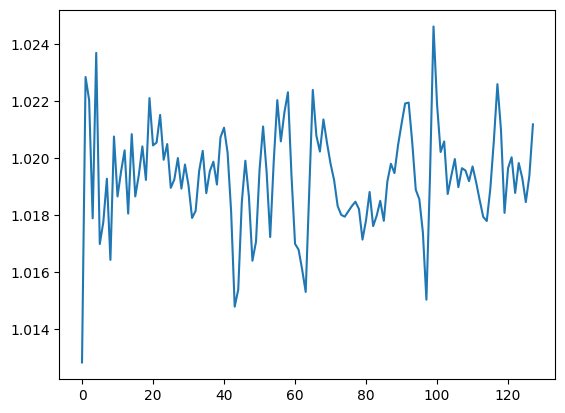

In [8]:
# Cada fila representa una Serie de Tiempo Independiente
# Ejemplo: Se imprime la serie de tiempo para la persona 0
plt.plot(total_acc_x[0])

# Graficando los labels

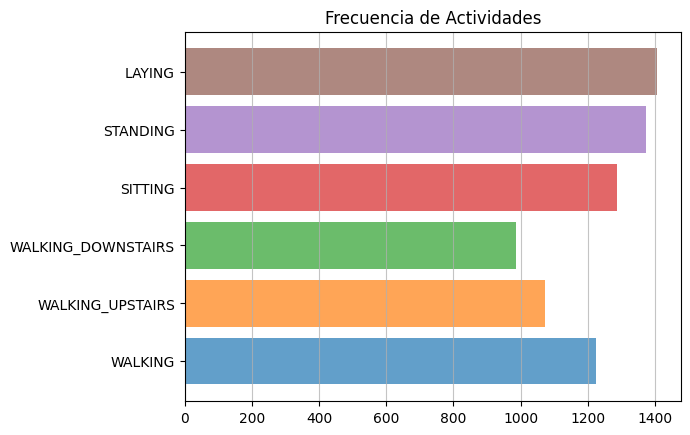

In [9]:
labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
frecuency = [np.sum(y == i) for i in range(1, 7)]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

#Un solo color: '#0504aa'
plt.barh(labels, frecuency, color=colors, alpha=0.7)

plt.title('Frecuencia de Actividades')
plt.grid(axis='x', alpha=0.75)
plt.show()

# Graficando las Series de Tiempo

## Normalización de la Base de Datos 

In [10]:
scaler = StandardScaler()


# Escalamos cada serie temporal por separado
total_acc_x_scaled = np.array([scaler.fit_transform(x.reshape(-1, 1)).flatten() for x in total_acc_x])
total_acc_y_scaled = np.array([scaler.fit_transform(y.reshape(-1, 1)).flatten() for y in total_acc_y])
total_acc_z_scaled = np.array([scaler.fit_transform(z.reshape(-1, 1)).flatten() for z in total_acc_z])

body_acc_x_scaled = np.array([scaler.fit_transform(x.reshape(-1, 1)).flatten() for x in body_acc_x])
body_acc_y_scaled = np.array([scaler.fit_transform(y.reshape(-1, 1)).flatten() for y in body_acc_y])
body_acc_z_scaled = np.array([scaler.fit_transform(z.reshape(-1, 1)).flatten() for z in body_acc_z])

body_gyro_x_scaled = np.array([scaler.fit_transform(x.reshape(-1, 1)).flatten() for x in body_gyro_x])
body_gyro_y_scaled = np.array([scaler.fit_transform(y.reshape(-1, 1)).flatten() for y in body_gyro_y])
body_gyro_z_scaled = np.array([scaler.fit_transform(z.reshape(-1, 1)).flatten() for z in body_gyro_z])


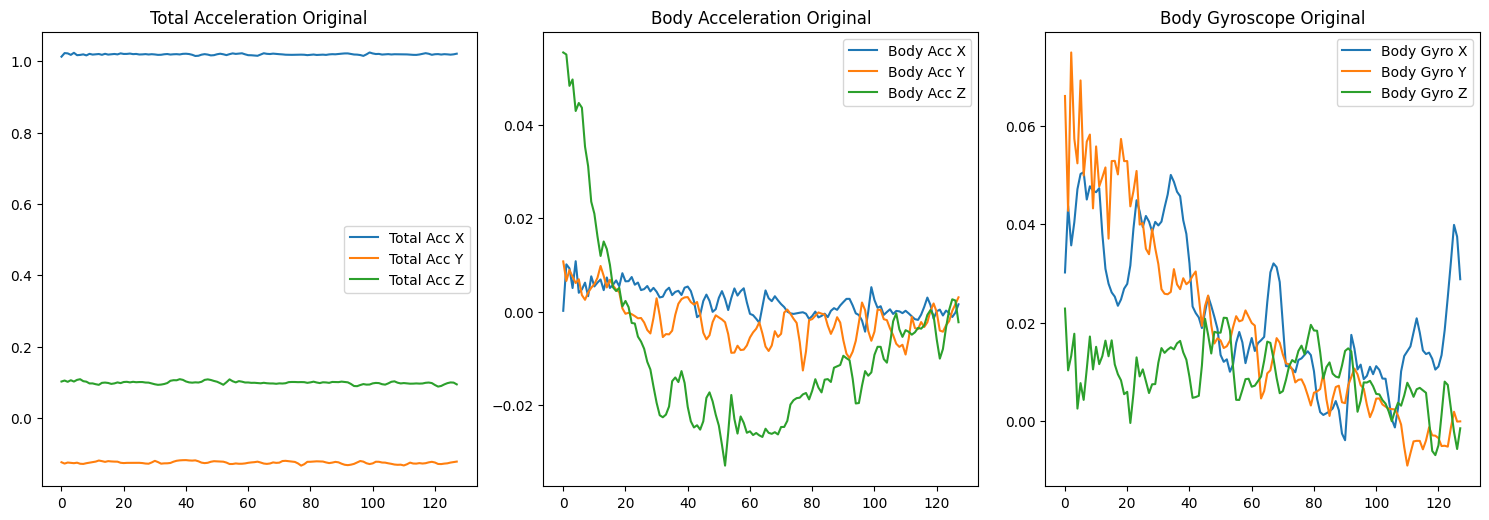

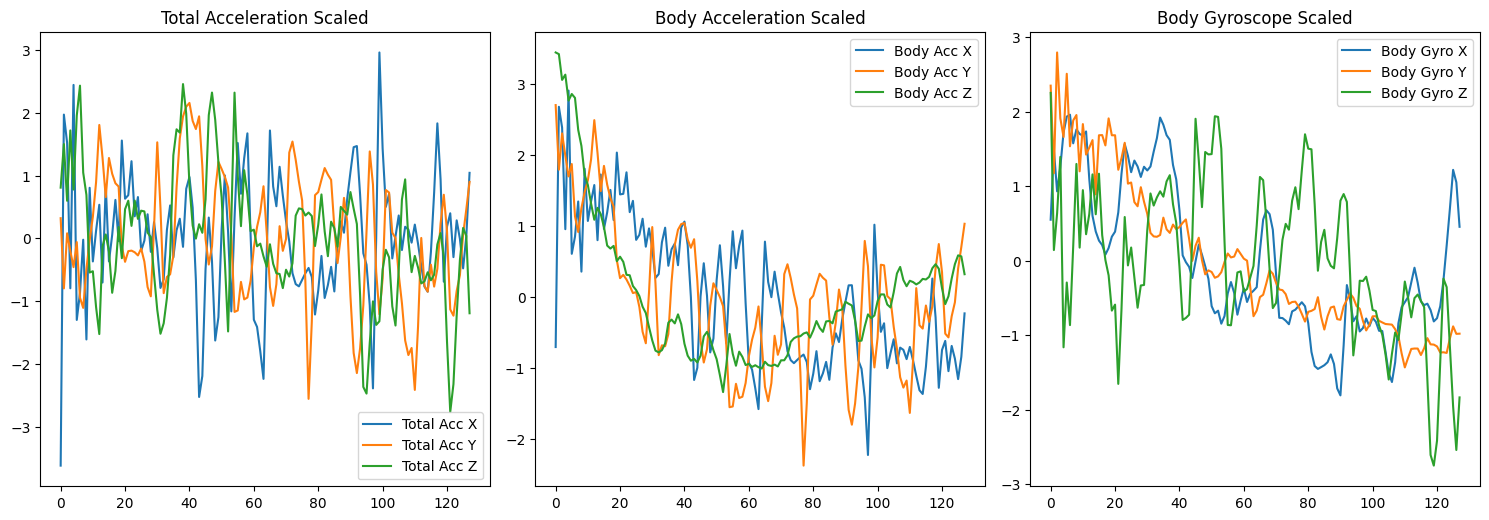

In [11]:
# Gráficos originales
# Crear una figura grande para acomodar todos los gráficos
plt.figure(figsize=(15, 10))

# Gráfico para total_acc
plt.subplot(2, 3, 1)
plt.plot(total_acc_x[0], label='Total Acc X')
plt.plot(total_acc_y[0], label='Total Acc Y')
plt.plot(total_acc_z[0], label='Total Acc Z')
plt.title('Total Acceleration Original')
plt.legend()

# Gráfico para body_acc
plt.subplot(2, 3, 2)
plt.plot(body_acc_x[0], label='Body Acc X')
plt.plot(body_acc_y[0], label='Body Acc Y')
plt.plot(body_acc_z[0], label='Body Acc Z')
plt.title('Body Acceleration Original')
plt.legend()

# Gráfico para body_gyro
plt.subplot(2, 3, 3)
plt.plot(body_gyro_x[0], label='Body Gyro X')
plt.plot(body_gyro_y[0], label='Body Gyro Y')
plt.plot(body_gyro_z[0], label='Body Gyro Z')
plt.title('Body Gyroscope Original')
plt.legend()

plt.tight_layout() 
plt.show()

# Gráficos escalados

plt.figure(figsize=(15, 10))

# Gráfico para total_acc
plt.subplot(2, 3, 1)
plt.plot(total_acc_x_scaled[0], label='Total Acc X')
plt.plot(total_acc_y_scaled[0], label='Total Acc Y')
plt.plot(total_acc_z_scaled[0], label='Total Acc Z')
plt.title('Total Acceleration Scaled')
plt.legend()

# Gráfico para body_acc
plt.subplot(2, 3, 2)
plt.plot(body_acc_x_scaled[0], label='Body Acc X')
plt.plot(body_acc_y_scaled[0], label='Body Acc Y')
plt.plot(body_acc_z_scaled[0], label='Body Acc Z')
plt.title('Body Acceleration Scaled')
plt.legend()

# Gráfico para body_gyro
plt.subplot(2, 3, 3)
plt.plot(body_gyro_x_scaled[0], label='Body Gyro X')
plt.plot(body_gyro_y_scaled[0], label='Body Gyro Y')
plt.plot(body_gyro_z_scaled[0], label='Body Gyro Z')
plt.title('Body Gyroscope Scaled')
plt.legend()

plt.tight_layout()  
plt.show()



## Creando Gráficos para cada Label

In [12]:
## Definiendo una funcion para graficar la series de tiempo en base a la fila
def plot_data(index, title_suffix):
  plt.figure(figsize=(15, 10))

  # Gráfico para total_acc
  plt.subplot(2, 3, 1)
  plt.plot(total_acc_x_scaled[index], label='Total Acc X')
  plt.plot(total_acc_y_scaled[index], label='Total Acc Y')
  plt.plot(total_acc_z_scaled[index], label='Total Acc Z')
  plt.title(f'Total Acceleration Scaled - {title_suffix}')
  plt.legend()

  # Gráfico para body_acc
  plt.subplot(2, 3, 2)
  plt.plot(body_acc_x_scaled[index], label='Body Acc X')
  plt.plot(body_acc_y_scaled[index], label='Body Acc Y')
  plt.plot(body_acc_z_scaled[index], label='Body Acc Z')
  plt.title(f'Body Acceleration Scaled - {title_suffix}')
  plt.legend()

  # Gráfico para body_gyro
  plt.subplot(2, 3, 3)
  plt.plot(body_gyro_x_scaled[index], label='Body Gyro X')
  plt.plot(body_gyro_y_scaled[index], label='Body Gyro Y')
  plt.plot(body_gyro_z_scaled[index], label='Body Gyro Z')
  plt.title(f'Body Gyroscope Scaled - {title_suffix}')
  plt.legend()

  plt.tight_layout() 
  plt.show()

In [13]:
index_dict = {}

for i in range(1, 7):
    index = np.where(y == i)[0]
    index_dict[i] = index[0] 

print(index_dict)

{1: 78, 2: 150, 3: 125, 4: 27, 5: 0, 6: 51}


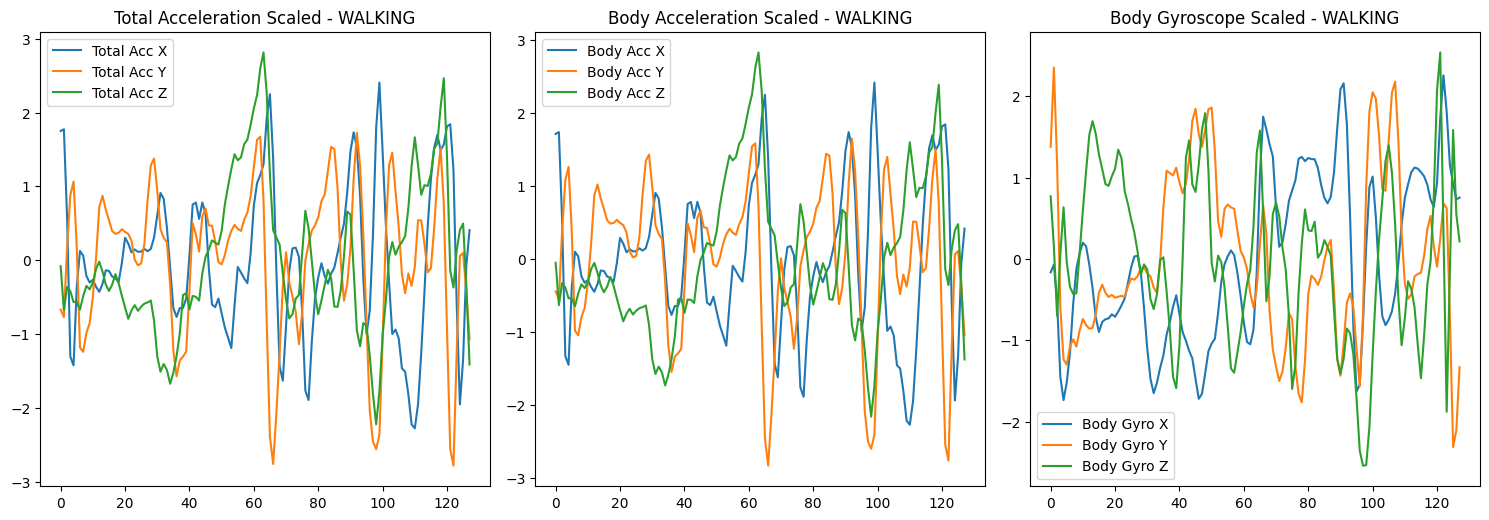

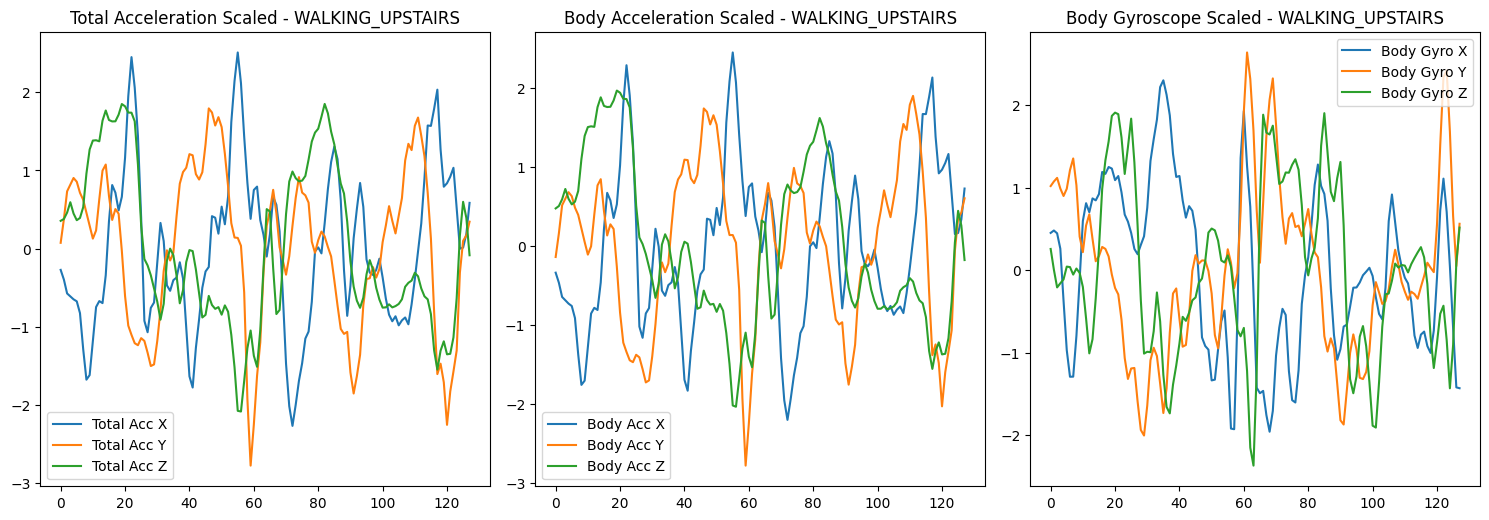

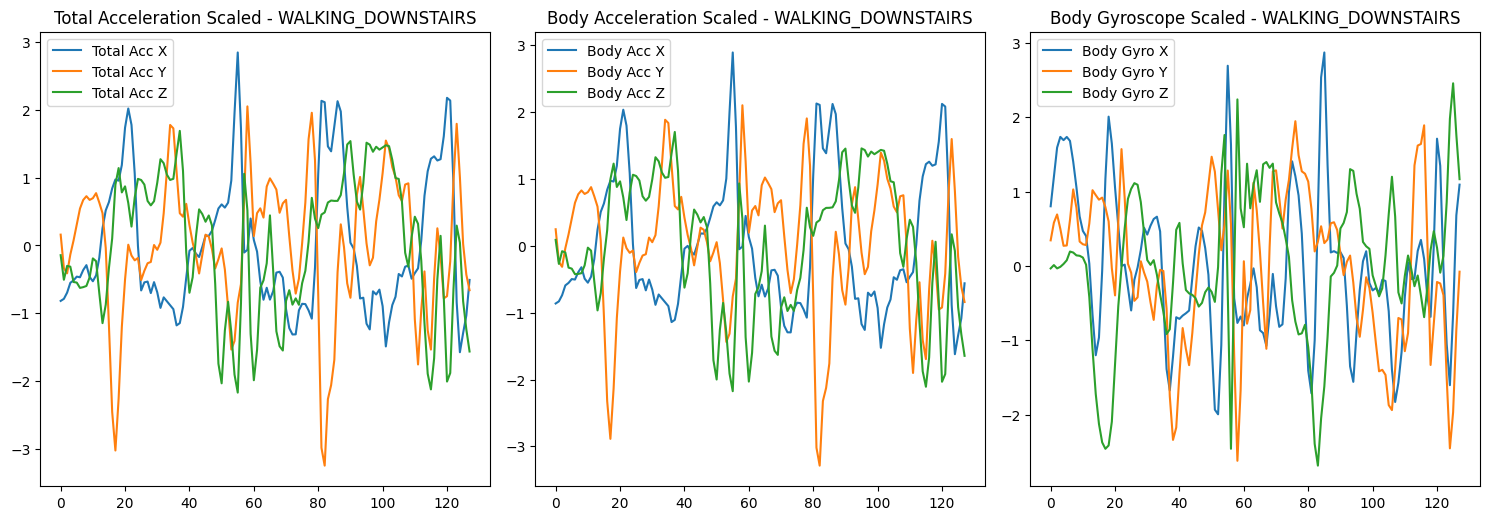

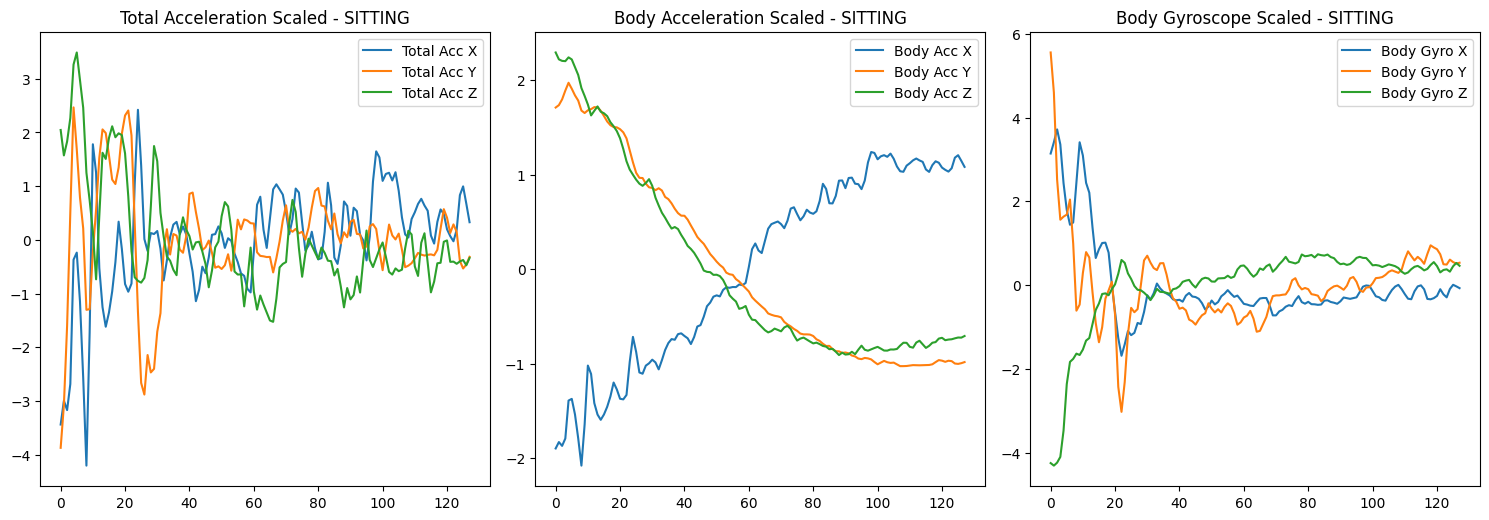

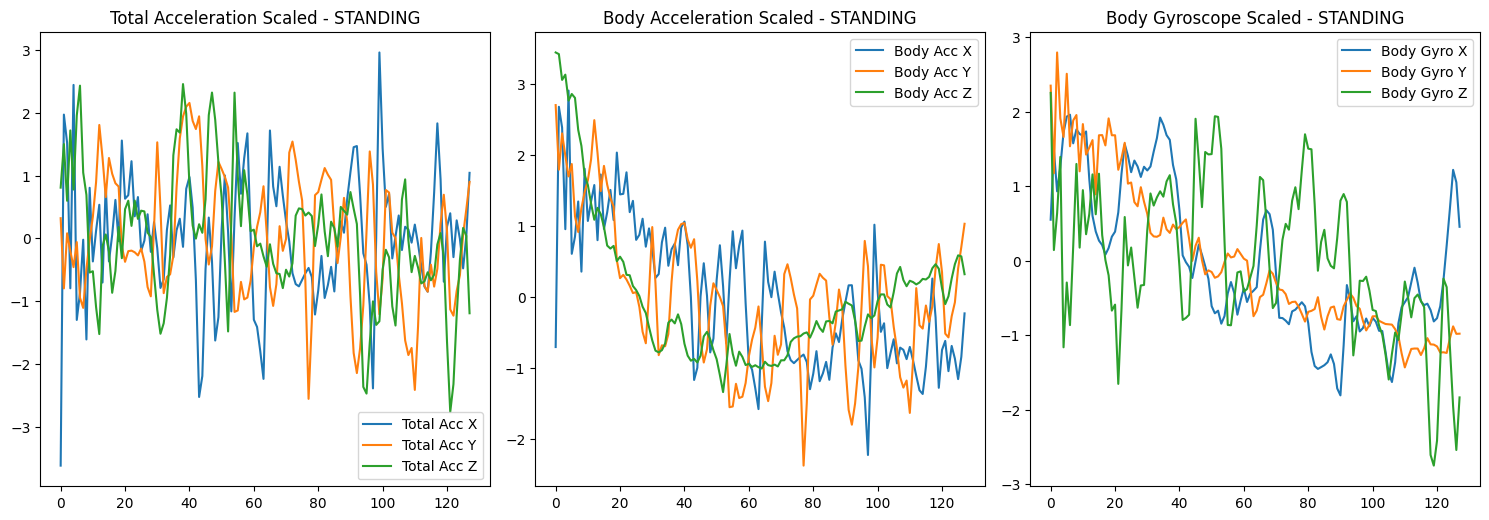

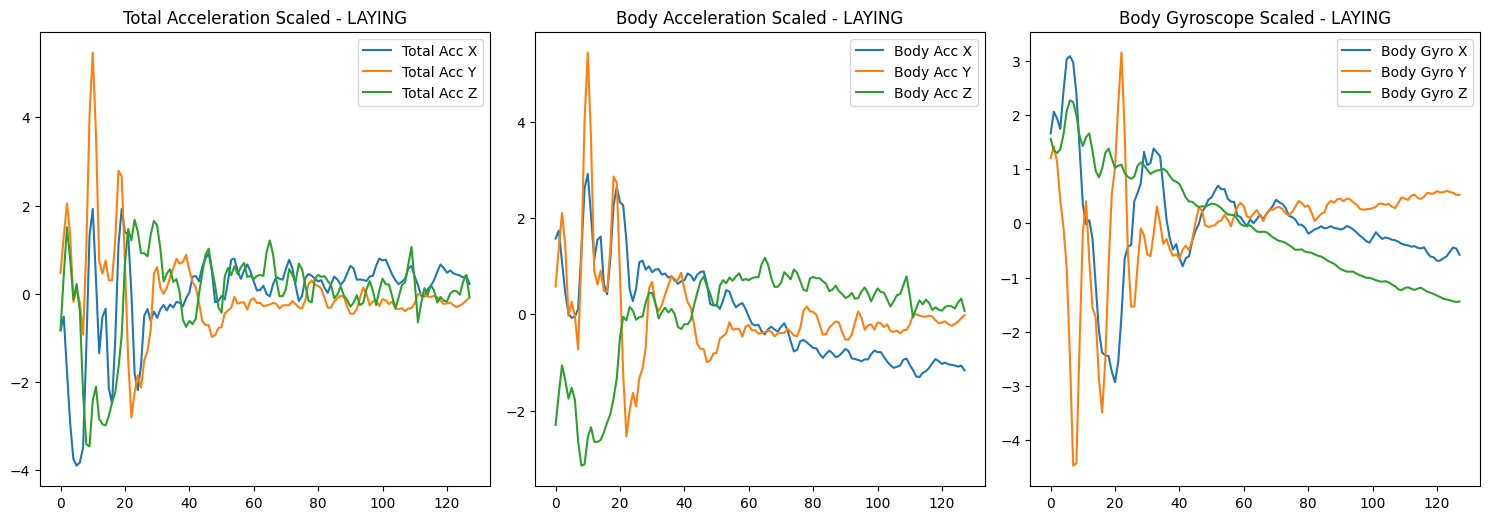

In [16]:
# Imprmiendo un ejemplo de la serie de tiempo para cada clase
plot_data(78, "WALKING")
plot_data(150, "WALKING_UPSTAIRS")
plot_data(125, "WALKING_DOWNSTAIRS")
plot_data(27, "SITTING")
plot_data( 0, "STANDING")
plot_data( 51, "LAYING")
